## Gamma finetuning

En esta notebook ajustamos el hiperparámetro gamma de la función de pérdida jerárquica. 

Recordemos que definimos nuestra función como

$$
L(y, \widehat{y}) = J(y_{HS}, \widehat{y_{HS}}) + \beta(y_{HS}) \sum_{x \in {TR, AG}} J(y_x, \widehat{y_x})\\
$$

siendo $J$ la entropía cruzada y $B(y) = (1-y) \gamma + y$ la función que pondera la pérdida de las variables del segundo 

Queremos encontrar el valor de $\gamma$ que maximice el EMR

## EMR

In [70]:
!ls ../../evaluations/hate_speech/dev/emr
from glob import glob 
import json
files = glob("../../evaluations/hate_speech/dev/emr/beto-taskb-hier-*.json")

runs = []

for path in files:
    with open(path) as f:
        run = json.load(f)

        runs.append(run)
        
data = []

for run in runs:
    gamma = run["train_args"]["gamma"]
    
    for evaluation in run["evaluations"]["hate_speech"]:
        data.append({
            "gamma": gamma,
            "emr": evaluation["eval_emr"],
            "emr_no_gating": evaluation["eval_emr_no_gating"],
            "macro_f1": evaluation["eval_macro_f1"],
            "hate_macro_f1": evaluation["eval_macro_hs_f1_score"],
        })

len(data)


beto-taskb-hier-0.005.json  beto-taskb-hier-0.1.json  beto-taskb-hier-0.8.json
beto-taskb-hier-0.00.json   beto-taskb-hier-0.2.json  beto-taskb-hier-0.9.json
beto-taskb-hier-0.01.json   beto-taskb-hier-0.3.json  beto-taskb-hier-1.0.json
beto-taskb-hier-0.05.json   beto-taskb-hier-0.7.json


110

In [71]:
import pandas as pd
df = pd.DataFrame(data)

df.groupby("gamma").mean()

,emr,emr_no_gating,macro_f1,hate_macro_f1
gamma,,,,
0.000,0.7904,0.3646,0.822042,0.852145
0.005,0.7920,0.6060,0.825141,0.853501
0.010,0.7916,0.6728,0.827629,0.860450
0.050,0.7892,0.7534,0.822162,0.856245
0.100,0.7924,0.7702,0.820598,0.853353
0.200,0.7888,0.7772,0.813419,0.849760
0.300,0.7854,0.7766,0.821130,0.853315
0.700,0.7842,0.7820,0.809725,0.849407
0.800,0.7836,0.7814,0.815442,0.852737


[]

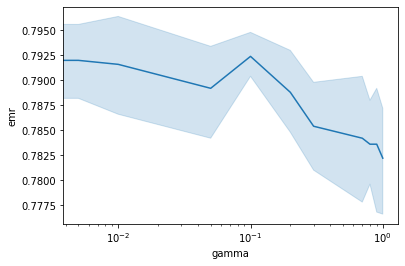

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x="gamma", y="emr", data=df)

plt.semilogx()

[]

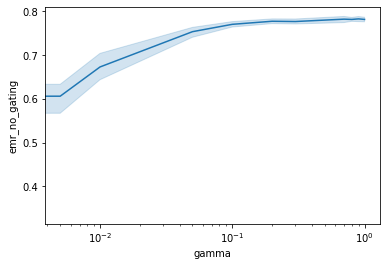

In [73]:

sns.lineplot(x="gamma", y="emr_no_gating", data=df)

plt.semilogx()